# Visualization of Final Reference Scenarios

In [1]:
from ema_workbench.analysis import parcoords
from dmdu.general.xlm_constants_epsilons import get_uncertainty_names
from model.pyrice import *
from dmdu.general.xlm_constants_epsilons import get_all_outcome_names
from ema_workbench import load_results
from dmdu.general.xlm_constants_epsilons import get_lever_names
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = os.path.join(
    os.getcwd(),
    'data',
    'reference_scenarios.csv'
)

# Load scenarios
scenarios = pd.read_csv(path)

# To change the order of the columns
x_names = get_uncertainty_names()
scenarios = scenarios.reindex(columns=x_names)

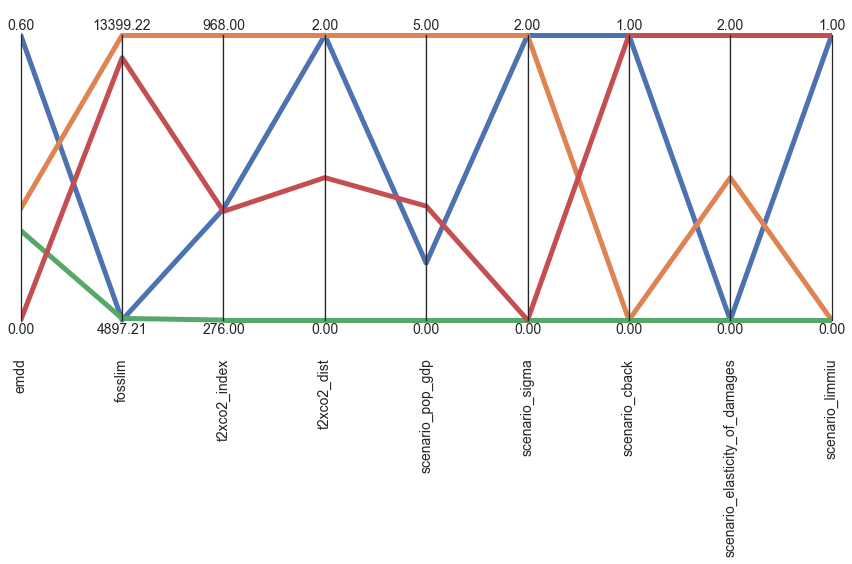

In [4]:
sns.set(font_scale=1.8)
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize': (12, 8)})

limits = parcoords.get_limits(scenarios)
axes = parcoords.ParallelAxes(limits)
axes.plot(scenarios, linewidth=5)
plt.show()


In [4]:
path = os.path.join(
    os.path.dirname(os.path.dirname(os.getcwd())),
    'outputimages',
    'scenariodiscovery',
    'reference_scenarios.png'
)
# axes.fig.savefig(path, dpi=200, pad_inches=0.2, bbox_inches='tight')

## Context Visualization

In [5]:
path = os.path.join(
    os.path.dirname(os.path.dirname(os.getcwd())),
    'exploration',
    'data',
    'results_open_exploration_30000'
)

## Load Results

In [6]:
results = load_results(path)

experiments, outcomes = results
outcomes = pd.DataFrame(outcomes)
cleaned_experiments = experiments.drop(columns=get_lever_names())
outcome_names = get_all_outcome_names()
outcome_names = [o + ' 2105' for o in outcome_names]

outcomes = outcomes.loc[:, outcome_names]
outcomes.columns = [c.split(' 2105')[0] for c in outcomes.columns]

outcomes = outcomes.rename(columns={
    'Distance to consumption threshold': 'Distance consumption',
    'Distance to damage threshold': 'Distance damage',
    'Population below consumption threshold': 'Population consumption',
    'Population above damage threshold': 'Population damage',
    'Intratemporal consumption Gini': 'Consumption Gini',
    'Intratemporal damage Gini': 'Damage Gini',
})

In [7]:
experiments = experiments.loc[:, get_uncertainty_names()]
experiments

,emdd,fosslim,t2xco2_index,t2xco2_dist,scenario_pop_gdp,scenario_sigma,scenario_cback,scenario_elasticity_of_damages,scenario_limmiu
0,0.453473,6314.416252,575,1,2,1,1,2,0
1,0.100512,8582.074847,678,1,0,2,1,2,1
2,0.370575,8454.543455,982,0,5,2,1,1,1
3,0.381410,9791.267411,598,0,0,0,1,0,0
4,0.007688,9394.089046,567,0,5,0,0,2,0
...,...,...,...,...,...,...,...,...,...
29995,0.136116,8389.246911,915,2,5,0,1,2,1
29996,0.198183,13249.802156,385,1,3,0,1,0,1
29997,0.460021,8236.417737,728,1,1,0,1,0,0
29998,0.590543,10609.643604,659,1,2,1,0,2,0


## Add run with extra scenario

In [8]:
ref_column = []

for row_idx, row in experiments.iterrows():
    category = f'normal'
    for ref_idx, ref_row in scenarios.iterrows():
        if row.equals(ref_row):
            category = f'ref_{ref_idx}'
            break
    ref_column.append(category)

ref_column = pd.Series(ref_column)
outcomes['reference'] = ref_column
outcomes = outcomes.sort_values(by=['reference'])

In [9]:
# ref_column.value_counts()

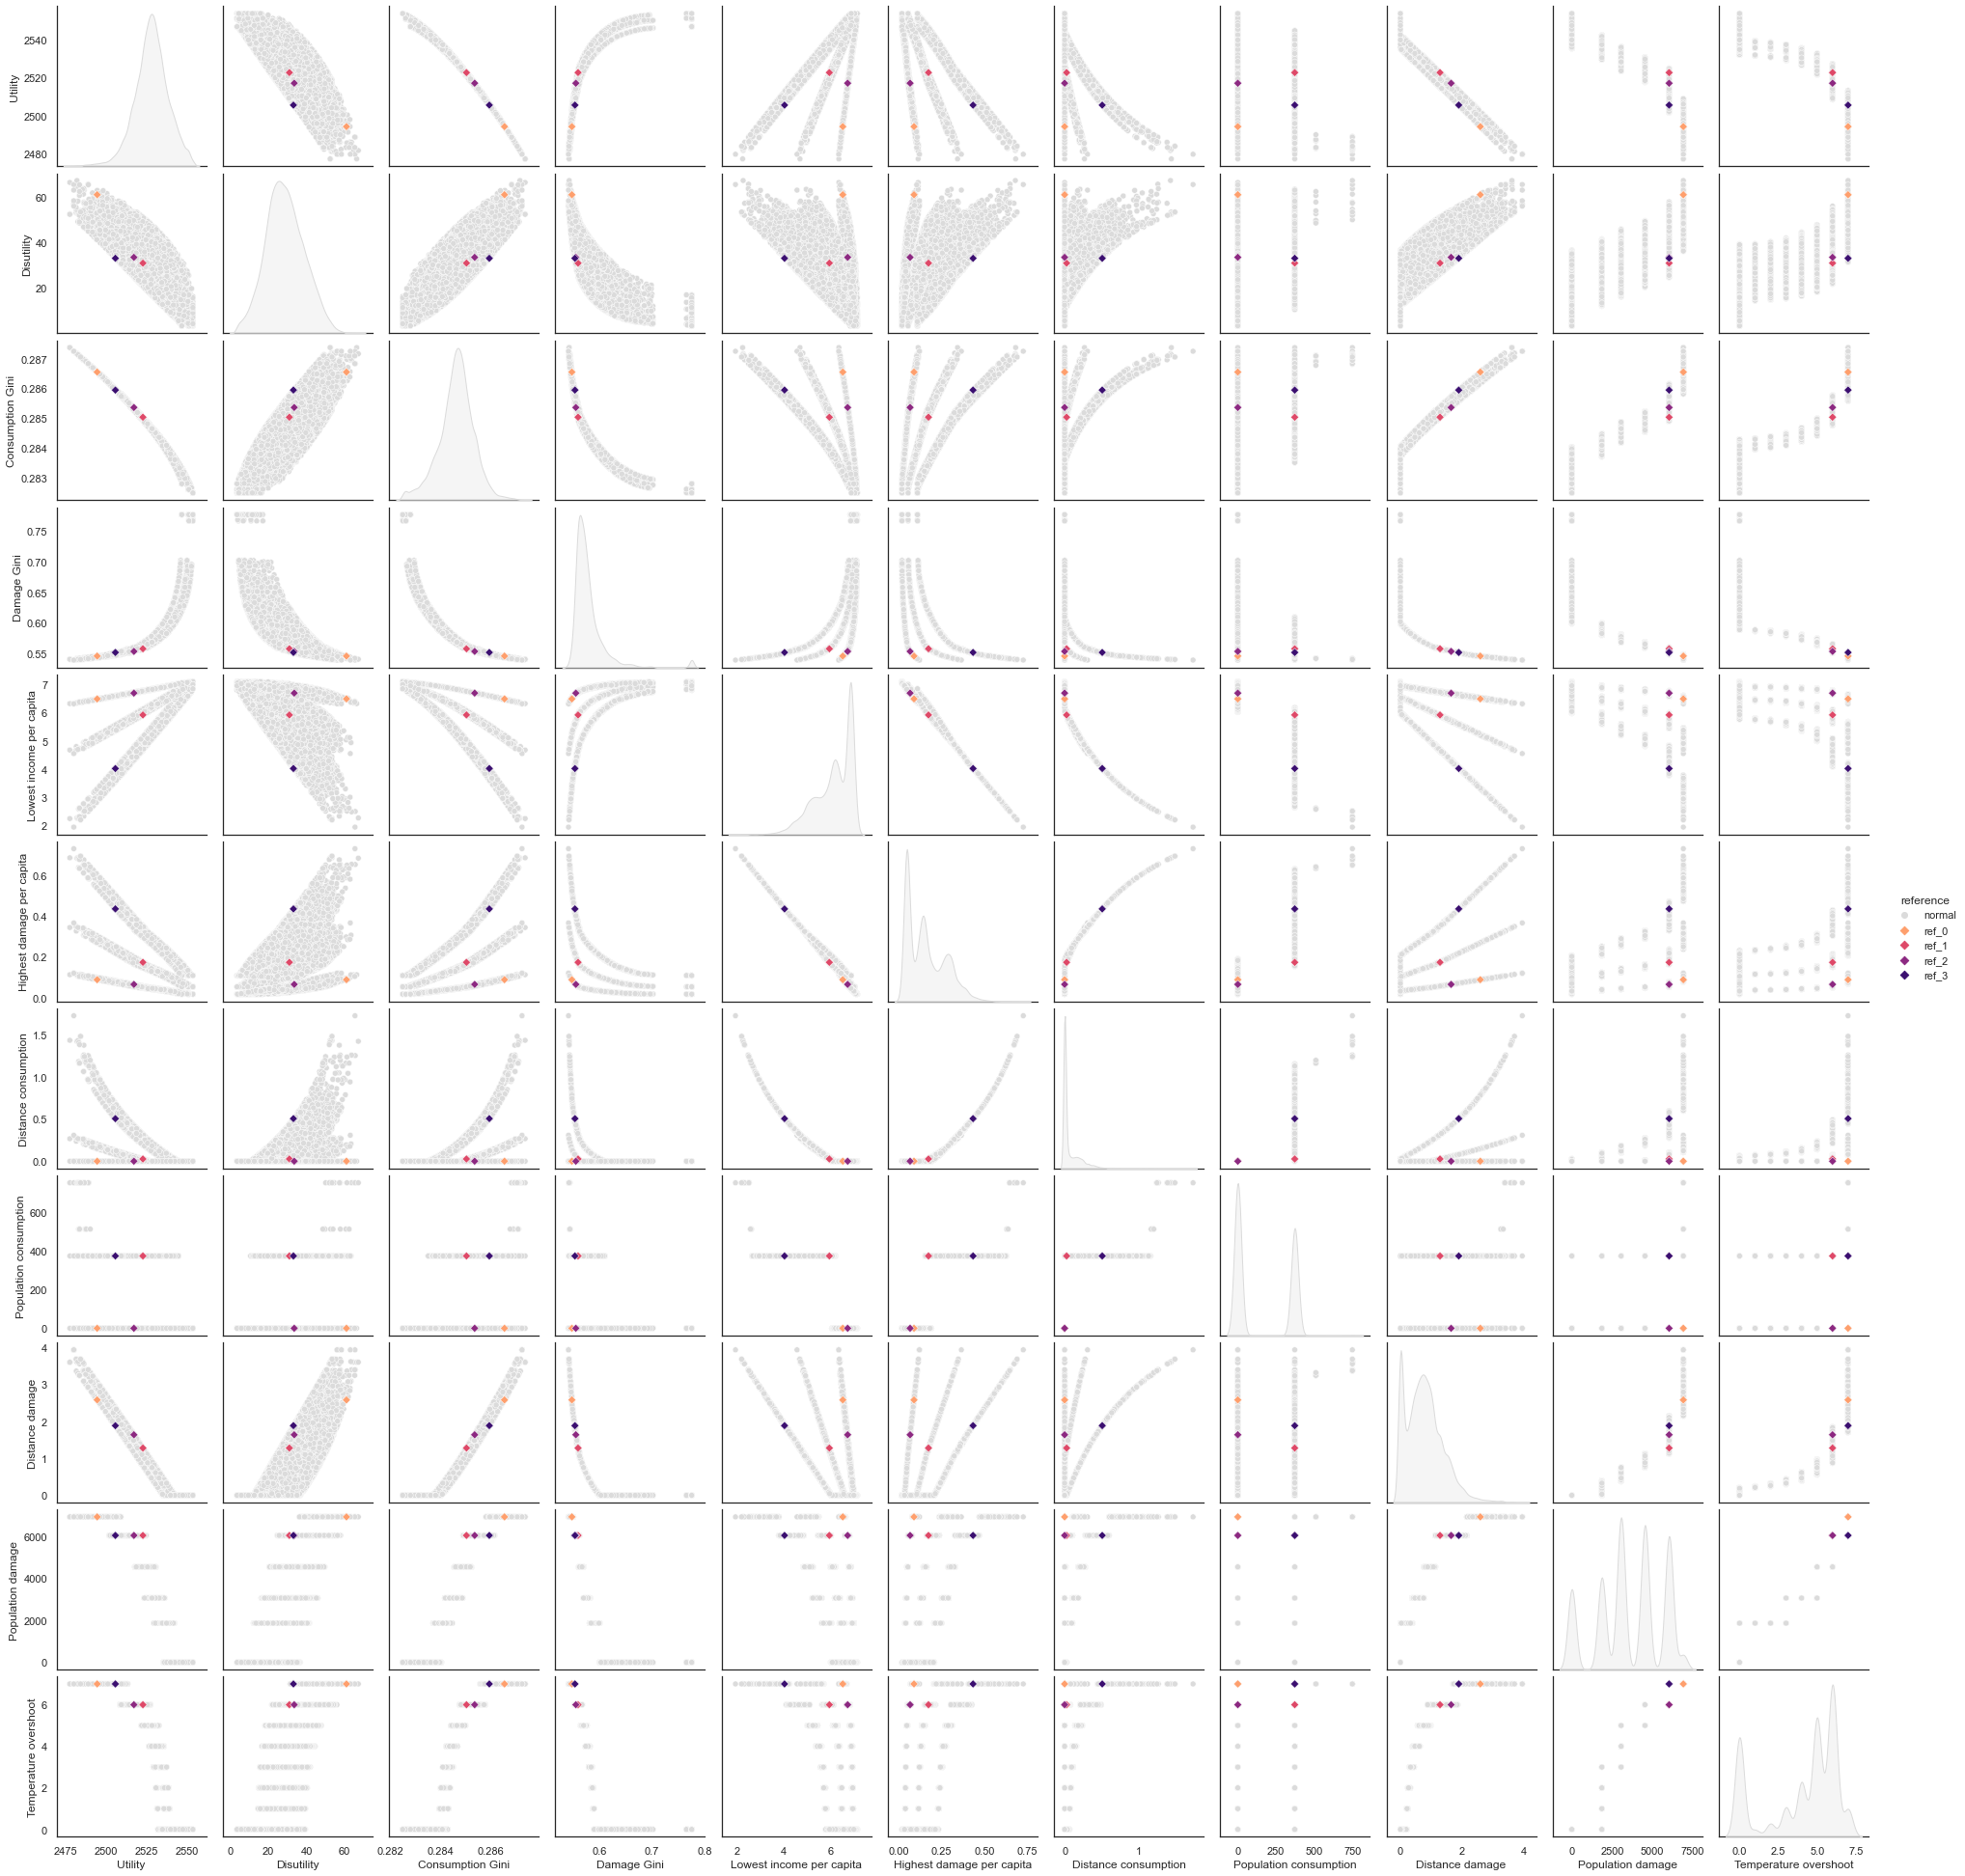

In [10]:
# Colors
colors = sns.color_palette('magma_r', 4)
colors.insert(0, (220/256,220/256,220/256))
sns.set_style('white')

# Plot
sns.pairplot(
    data=outcomes,
    hue='reference',
    palette=colors,
    markers=["o", "D", "D", "D", "D"]
)

sns.set(rc={'figure.figsize': (40, 40)})

saving_path = os.path.join(
    os.path.dirname(os.path.dirname(os.getcwd())),
    'outputimages',
    'scenariodiscovery',
    'pairplot_with_reference_scenarios.png'
)
plt.savefig(saving_path, dpi=200, bbox_inches='tight')
plt.show()